In [1]:
import numpy as np
from statsgaim.stats_ppr import PPRClassifier

# SIM: Quadratic Function

In [2]:
np.random.seed(2020)
n = int(1e4)
x = np.random.normal(0, 0.3, size=(n, 6))
beta = np.array([3, -2.5, 2, -1.5, 1.5, -1.0])/5
z = np.dot(x.reshape(-1,6),beta)
f = z**2
noise = np.random.randn(n)

y = 1 / (1 + np.exp(-f)) + 0.05 * np.random.randn(n)
y = y - np.mean(y)
y[y <= 0] = 0
y[y > 0] = 1

In [3]:
clf = PPRClassifier(nterms=1,optlevel=2)
clf.fit(x,y)

PPRClassifier(nterms=1)

In [4]:
clf.projection_indices_

array([[ 0.60687971],
       [-0.48549936],
       [ 0.42483139],
       [-0.28860203],
       [ 0.30226394],
       [-0.20211645]])

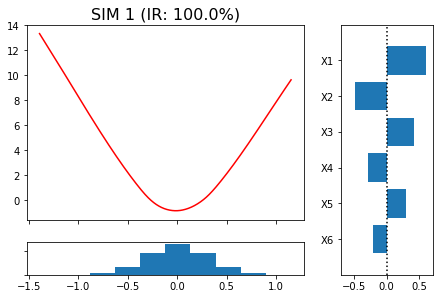

In [5]:
clf.visualize()

# AIM: Quadratic + Linear

In [6]:
np.random.seed(2020)
n = int(1e4)
x = np.random.normal(0, 0.3, size=(n, 6))
beta = np.array([3, -2.5, 2, -1.5, 1.5, -1.0])/5
z1 = beta[0] * x[:, 0] + beta[1] * x[:, 1] + beta[2] * x[:, 2]
z2 = beta[3] * x[:, 3] + beta[4] * x[:, 4] + beta[5] * x[:, 5]
f = 0.5*z1+z2**2

y = 1 / (1 + np.exp(-f)) + 0.05 * np.random.randn(n)
y = y - np.mean(y)
y[y <= 0] = 0
y[y > 0] = 1

In [7]:
clf2 = PPRClassifier(nterms=2,optlevel=2)
clf2.fit(x,y)

PPRClassifier(nterms=2)

In [8]:
clf2.projection_indices_

array([[ 0.68789927,  0.03393624],
       [-0.58876974, -0.06256431],
       [ 0.42403647, -0.12040553],
       [ 0.01639161,  0.65277109],
       [-0.00405329, -0.6734157 ],
       [ 0.0072628 ,  0.31754961]])

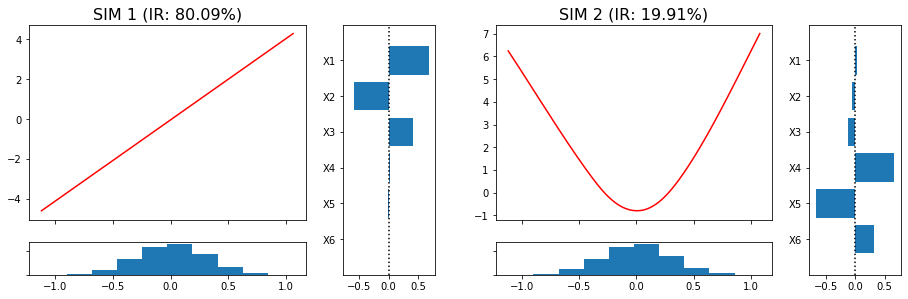

In [9]:
clf2.visualize()

# Non-additive Model

In [10]:
np.random.seed(2020)
n = int(1e4)
x = np.random.normal(0, 0.3, size=(n, 6))
f = 3*np.pi**(x[:,0]*x[:,1])*np.sqrt(2*np.abs(x[:,2]+1))
y = 1 / (1 + np.exp(-f)) + 0.05 * np.random.randn(n)
y = y - np.mean(y)
y[y <= 0] = 0
y[y > 0] = 1

In [11]:
clf3 = PPRClassifier(nterms=2,optlevel=2)
clf3.fit(x,y)

PPRClassifier(nterms=2)

In [12]:
clf3.projection_indices_

array([[ 0.02484738, -0.05923274],
       [-0.00756025,  0.08898531],
       [ 0.99782842, -0.64524663],
       [-0.01555696,  0.73872155],
       [-0.05807771,  0.00282734],
       [ 0.00699006, -0.16282619]])

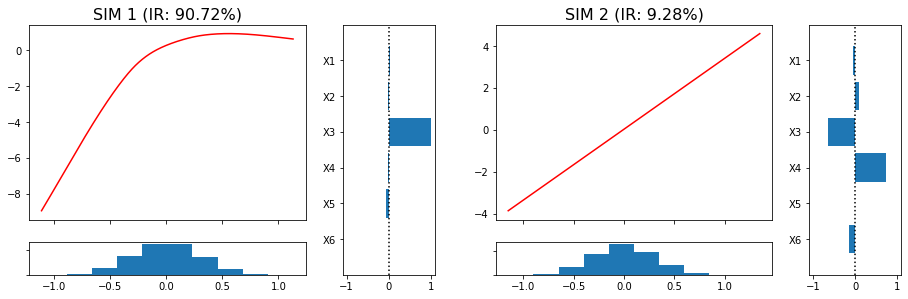

In [13]:
clf3.visualize()